[House Price Dataset](https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction/code)

In [2]:
import shutil
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harishkumardatalab/housing-price-prediction")
print("Path to dataset files:", path)

# Create Folder
destination = "/content/housing-price-prediction"
os.makedirs(destination, exist_ok=True)

# Copy entire folder
shutil.copytree("/kaggle/input/housing-price-prediction", destination, dirs_exist_ok=True)
print("Move to:", destination)

Using Colab cache for faster access to the 'housing-price-prediction' dataset.
Path to dataset files: /kaggle/input/housing-price-prediction
Move to: /content/housing-price-prediction


In [3]:
import pandas as pd

# Load dataset
data = pd.read_csv("/content/housing-price-prediction/Housing.csv")
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


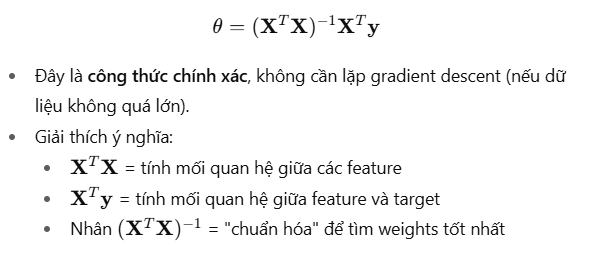

**Gi·∫£i th√≠ch:**  
Linear Regression ch·ªâ l√†m vi·ªác v·ªõi d·ªØ li·ªáu s·ªë. C√°c c·ªôt d·∫°ng `object` (nh∆∞ yes/no ho·∫∑c category) c·∫ßn ƒë∆∞·ª£c chuy·ªÉn sang s·ªë ƒë·ªÉ m√¥ h√¨nh c√≥ th·ªÉ t√≠nh to√°n ƒë∆∞·ª£c weights v√† d·ª± ƒëo√°n gi√° tr·ªã `price`.


**Gi·∫£i th√≠ch:**  
V√¨ `furnishingstatus` c√≥ nhi·ªÅu h∆°n 2 category, ta d√πng one-hot encoding ƒë·ªÉ chuy·ªÉn m·ªói category th√†nh c·ªôt s·ªë ri√™ng, gi√∫p Linear Regression x·ª≠ l√Ω t·∫•t c·∫£ category m√† v·∫´n gi·ªØ th√¥ng tin ƒë·∫ßy ƒë·ªß.


In [5]:
import pandas as pd
import numpy as np

# Chuy·ªÉn yes/no th√†nh 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0})

# One-hot encode cho 'furnishingstatus'
data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)

# T√¨m t·∫•t c·∫£ c·ªôt dummy (bool) v√† chuy·ªÉn sang int
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)

# Ki·ªÉm tra l·∫°i
print(data.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                                0                             0  
1                       

**Gi·∫£i th√≠ch:**  
C·ªôt to√†n 1 ƒë∆∞·ª£c th√™m v√†o X ƒë·ªÉ Linear Regression h·ªçc ƒë∆∞·ª£c bias (Œ∏‚ÇÄ), t·ª©c intercept c·ªßa ƒë∆∞·ªùng h·ªìi quy.


In [6]:
# Ch·ªçn target l√† Price so v·ªõi c√°c features c√≤n l·∫°i
X = data.drop('price', axis=1).values
y = data['price'].values

# Th√™m bias term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

In [7]:
print(data.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                                0                             0  
1                       

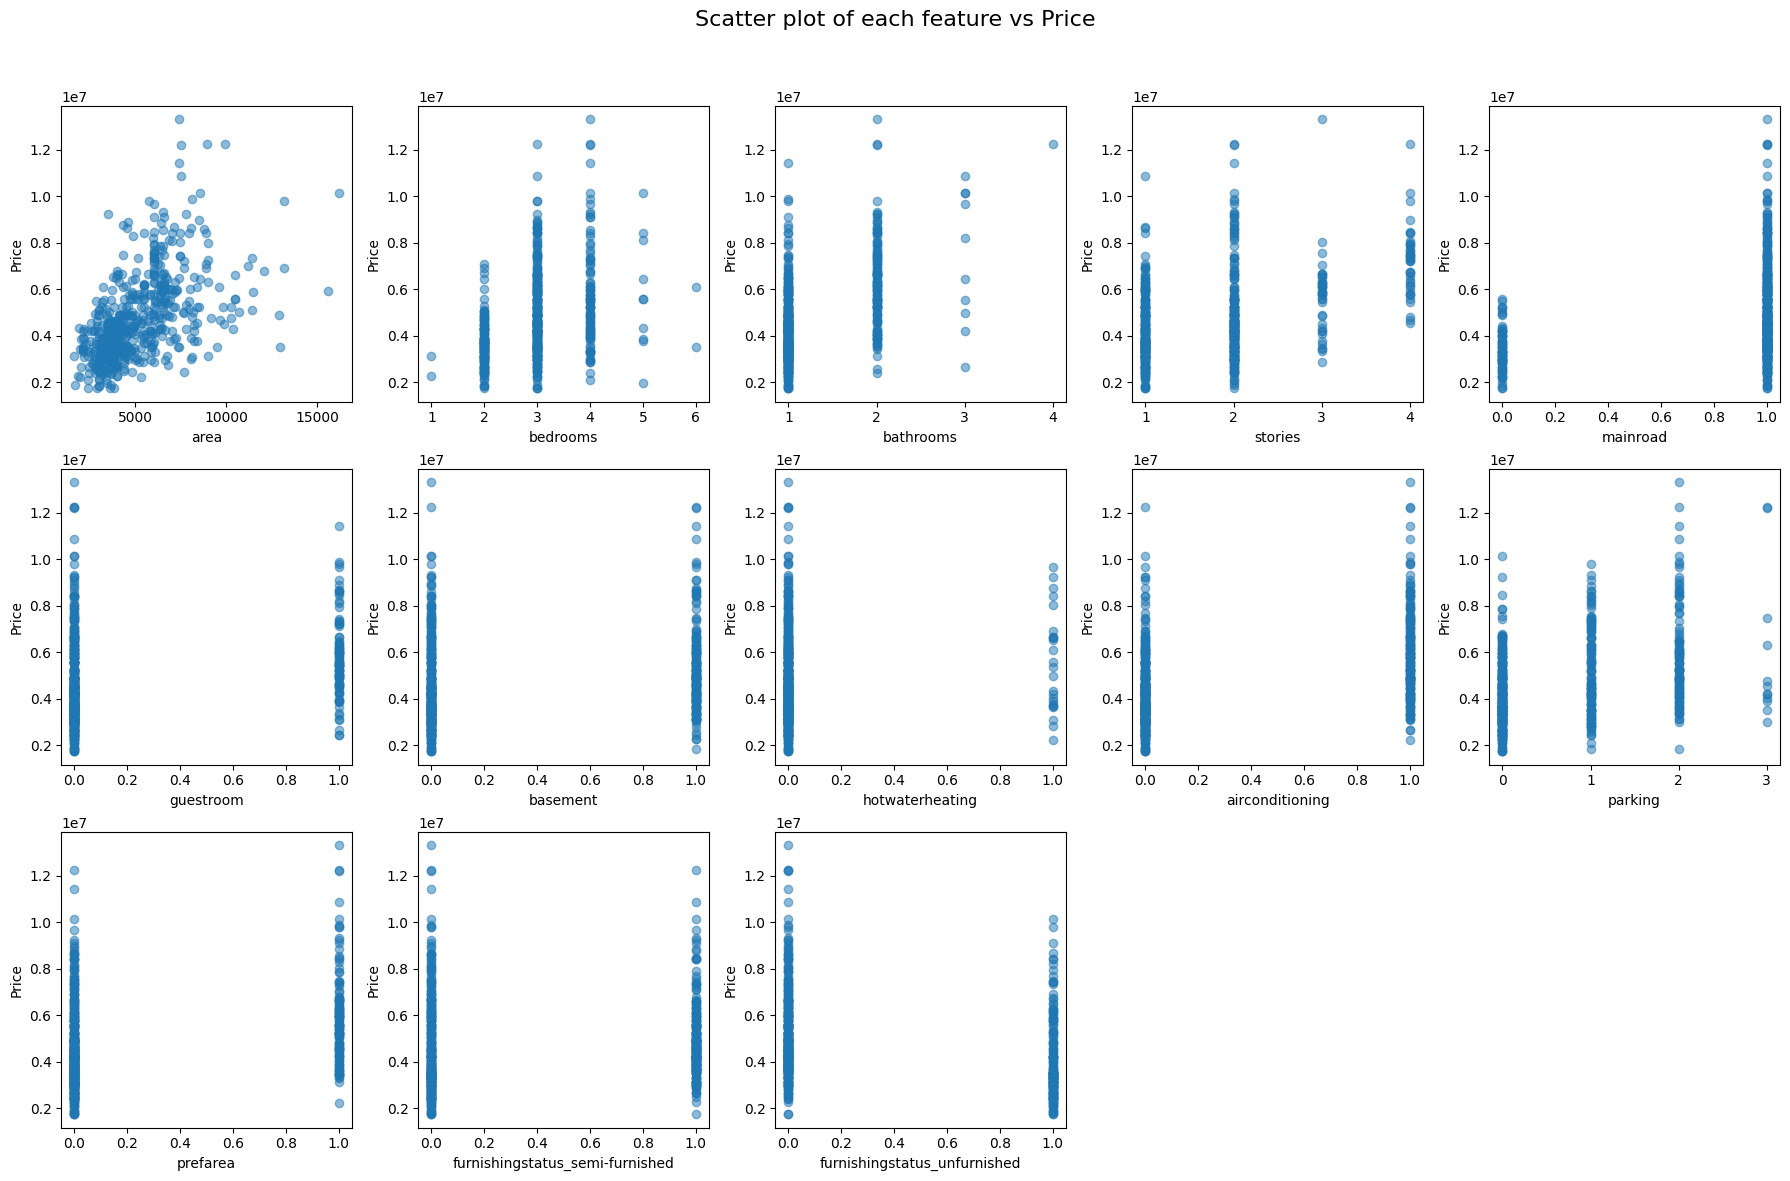

In [8]:
import matplotlib.pyplot as plt

# L·∫•y t√™n c√°c feature (b·ªè c·ªôt price)
feature_names = data.drop('price', axis=1).columns

plt.figure(figsize=(18,12))  # t√πy ch·ªânh k√≠ch th∆∞·ªõc figure

for i, feature in enumerate(feature_names):
    plt.subplot(3, 5, i+1)  # chia figure th√†nh 3 h√†ng 5 c·ªôt
    plt.scatter(data[feature], data['price'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.tight_layout()

plt.suptitle("Scatter plot of each feature vs Price", fontsize=16)
plt.subplots_adjust(top=0.9)  # ƒë·ªÉ ti√™u ƒë·ªÅ kh√¥ng b·ªã ƒë√®
plt.show()

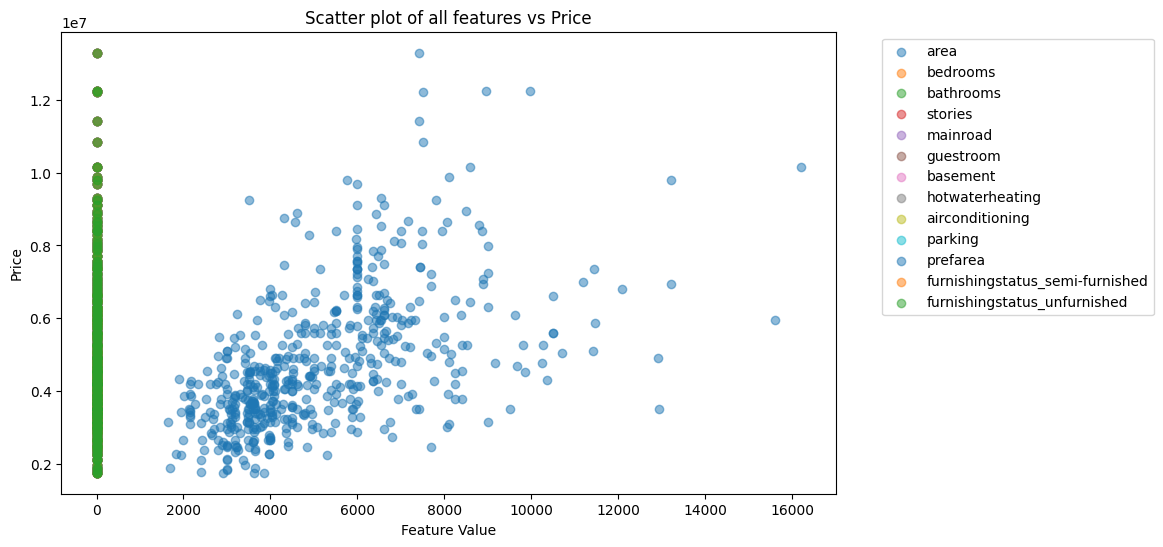

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

feature_names = data.drop('price', axis=1).columns

for feature in feature_names:
    plt.scatter(data[feature], data['price'], alpha=0.5, label=feature)

plt.xlabel('Feature Value')
plt.ylabel('Price')
plt.title('Scatter plot of all features vs Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # hi·ªán legend b√™n ph·∫£i
plt.show()


In [10]:
import numpy as np

# X_b: ma tr·∫≠n feature ƒë√£ th√™m bias
# y: target (price)

# T√≠nh theta b·∫±ng Normal Equation
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Weights (theta):")
for i, col in enumerate(['bias'] + list(data.drop('price', axis=1).columns)):
    print(f"{col}: {theta[i]}")

Weights (theta):
bias: 42771.693918098674
area: 244.13938627175244
bedrooms: 114787.56018468786
bathrooms: 987668.1072860276
stories: 450848.0028590417
mainroad: 421272.588725606
guestroom: 300525.85963610216
basement: 350106.90413615806
hotwaterheating: 855447.1453970394
airconditioning: 864958.3113174667
parking: 277107.1013421587
prefarea: 651543.7998630085
furnishingstatus_semi-furnished: -46344.61997996912
furnishingstatus_unfurnished: -411234.3861571659


In [11]:
from sklearn.linear_model import LinearRegression

X = data.drop('price', axis=1)
y = data['price']

model = LinearRegression()
model.fit(X, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 2.44139386e+02  1.14787560e+05  9.87668107e+05  4.50848003e+05
  4.21272589e+05  3.00525860e+05  3.50106904e+05  8.55447145e+05
  8.64958311e+05  2.77107101e+05  6.51543800e+05 -4.63446200e+04
 -4.11234386e+05]
Intercept: 42771.6939181108


In [12]:
# L·∫•y t√™n c√°c feature
feature_names = ['bias'] + list(data.drop('price', axis=1).columns)

# In ra equation
equation = "Price = "
for i, col in enumerate(feature_names):
    coef = theta[i]
    if i == 0:
        equation += f"{coef:.2f}"
    else:
        equation += f" + ({coef:.2f} * {col})"

print("Linear Regression Equation:")
print(equation)

Linear Regression Equation:
Price = 42771.69 + (244.14 * area) + (114787.56 * bedrooms) + (987668.11 * bathrooms) + (450848.00 * stories) + (421272.59 * mainroad) + (300525.86 * guestroom) + (350106.90 * basement) + (855447.15 * hotwaterheating) + (864958.31 * airconditioning) + (277107.10 * parking) + (651543.80 * prefarea) + (-46344.62 * furnishingstatus_semi-furnished) + (-411234.39 * furnishingstatus_unfurnished)


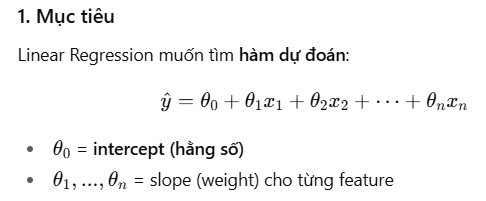

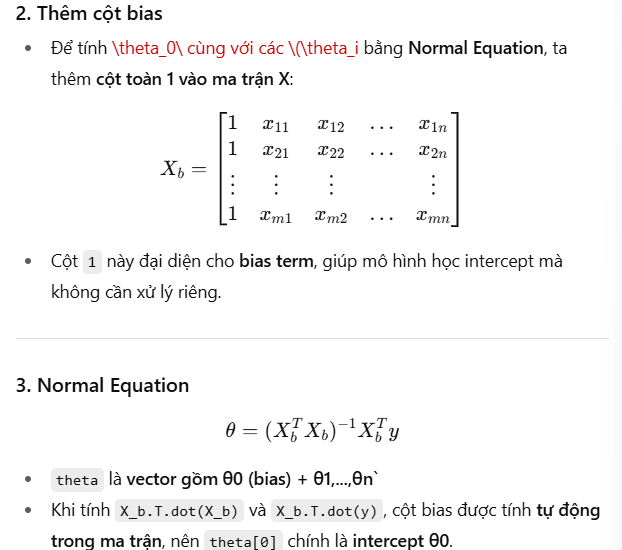

In [13]:
# In danh s√°ch c√°c feature v√† index c·ªßa n√≥ trong X_b
features = ['bias'] + list(data.drop('price', axis=1).columns)

print("Danh s√°ch feature v√† index:")
for i, col in enumerate(features):
    print(f"{i}: {col}")

Danh s√°ch feature v√† index:
0: bias
1: area
2: bedrooms
3: bathrooms
4: stories
5: mainroad
6: guestroom
7: basement
8: hotwaterheating
9: airconditioning
10: parking
11: prefarea
12: furnishingstatus_semi-furnished
13: furnishingstatus_unfurnished


## üîπ 2D vs 3D trong Linear Regression

- **2D plot**: ch·ªâ bi·ªÉu di·ªÖn ƒë∆∞·ª£c m·ªëi quan h·ªá gi·ªØa `Price` v√† **1 feature** (v√≠ d·ª• `Area`).  
  üëâ Cho ra **ƒë∆∞·ªùng h·ªìi quy**.  

- **3D plot**: bi·ªÉu di·ªÖn `Price` theo **2 feature** (v√≠ d·ª• `Area` v√† `Bedrooms`).  
  üëâ Cho ra **m·∫∑t ph·∫≥ng h·ªìi quy**.  

- V·ªõi nhi·ªÅu feature (>2), kh√¥ng th·ªÉ tr·ª±c quan h√≥a tr·ª±c ti·∫øp ‚Üí ch·ªâ ph√¢n t√≠ch h·ªá s·ªë.  


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Feature: area
X_area = data['area'].values
y = data['price'].values

# Th√™m bias ƒë·ªÉ fit b·∫±ng Normal Equation
X_b = np.c_[np.ones(len(X_area)), X_area]
theta_simple = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

bias_manual = theta_simple[0]
coef_manual = theta_simple[1]

In [15]:
from sklearn.linear_model import LinearRegression

X_area_2D = X_area.reshape(-1, 1)
model = LinearRegression()
model.fit(X_area_2D, y)

bias_sklearn = model.intercept_
coef_sklearn = model.coef_[0]

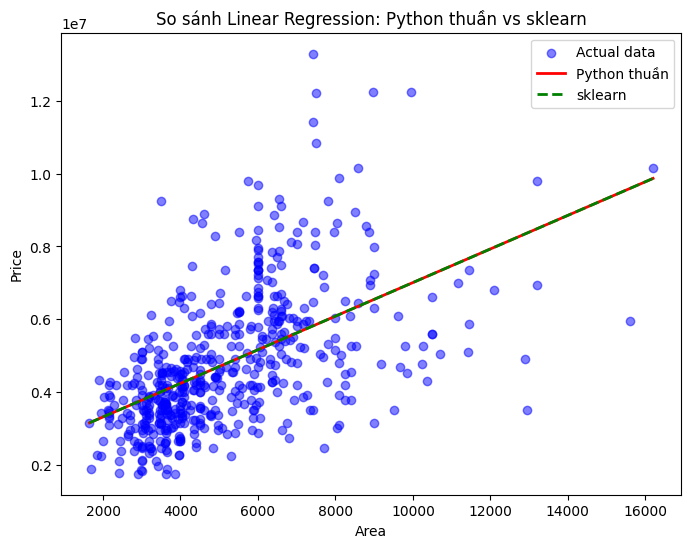

Python thu·∫ßn -> Bias: 2387308.4823964285 Coef: 461.9748942727837
sklearn      -> Bias: 2387308.48239643 Coef: 461.97489427278344


In [16]:
# Tr·ª•c X cho ƒë∆∞·ªùng h·ªìi quy
x_line = np.linspace(X_area.min(), X_area.max(), 100)

# D·ª± ƒëo√°n t·ª´ m√¥ h√¨nh thu·∫ßn python
y_line_manual = bias_manual + coef_manual * x_line

# D·ª± ƒëo√°n t·ª´ sklearn
y_line_sklearn = bias_sklearn + coef_sklearn * x_line

# V·∫Ω scatter
plt.figure(figsize=(8,6))
plt.scatter(X_area, y, color="blue", alpha=0.5, label="Actual data")

# V·∫Ω 2 ƒë∆∞·ªùng h·ªìi quy
plt.plot(x_line, y_line_manual, color="red", linewidth=2, label="Python thu·∫ßn")
plt.plot(x_line, y_line_sklearn, color="green", linestyle="--", linewidth=2, label="sklearn")

plt.xlabel("Area")
plt.ylabel("Price")
plt.title("So s√°nh Linear Regression: Python thu·∫ßn vs sklearn")
plt.legend()
plt.show()

print("Python thu·∫ßn -> Bias:", bias_manual, "Coef:", coef_manual)
print("sklearn      -> Bias:", bias_sklearn, "Coef:", coef_sklearn)

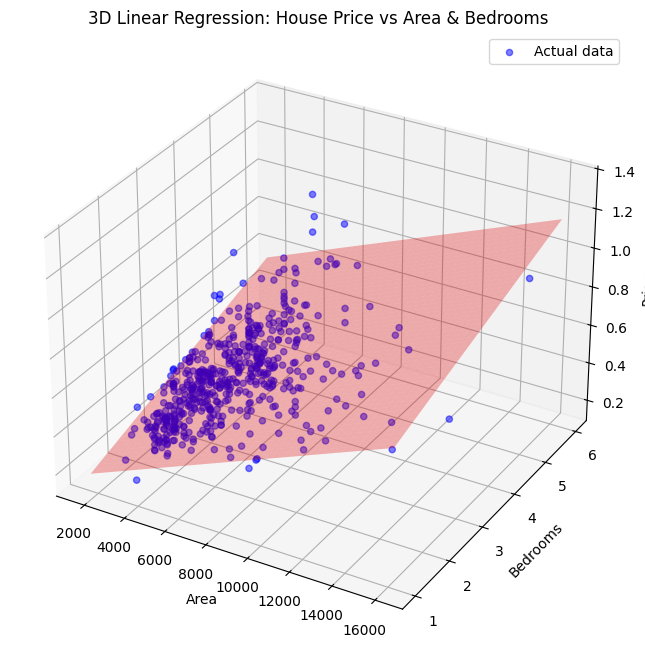

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.linear_model import LinearRegression

# Ch·ªçn 2 feature
X = data[['area', 'bedrooms']].values
y = data['price'].values

# Train Linear Regression
model = LinearRegression()
model.fit(X, y)

# T·∫°o l∆∞·ªõi ƒëi·ªÉm ƒë·ªÉ v·∫Ω m·∫∑t ph·∫≥ng h·ªìi quy
x_surf, y_surf = np.meshgrid(
    np.linspace(X[:,0].min(), X[:,0].max(), 50),
    np.linspace(X[:,1].min(), X[:,1].max(), 50)
)
z_surf = model.intercept_ + model.coef_[0]*x_surf + model.coef_[1]*y_surf

# V·∫Ω 3D scatter + plane
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Scatter d·ªØ li·ªáu th·ª±c
ax.scatter(X[:,0], X[:,1], y, c='blue', marker='o', alpha=0.5, label="Actual data")

# Surface c·ªßa model
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.3)

ax.set_xlabel("Area")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price")
ax.set_title("3D Linear Regression: House Price vs Area & Bedrooms")
plt.legend()
plt.show()

In [18]:
import numpy as np

features = ['bias'] + list(data.drop('price', axis=1).columns)

# H√†m d·ª± ƒëo√°n gi√°
def predict_price(feature_values):
    """
    feature_values: dict ch·ª©a gi√° tr·ªã c√°c feature
    """
    x = np.array([1] + [feature_values.get(col, 0) for col in features[1:]])  # th√™m bias = 1
    return x.dot(theta)

# V√≠ d·ª• 2 tr∆∞·ªùng h·ª£p
case1 = {
    "area": 4000,
    "bedrooms": 3,
    "bathrooms": 2,
    "stories": 2,
    "mainroad": 1,
    "guestroom": 0,
    "basement": 1,
    "hotwaterheating": 0,
    "airconditioning": 1,
    "parking": 2,
    "prefarea": 1,
    "furnishingstatus_semi-furnished": 0,
    "furnishingstatus_unfurnished": 1
}

case2 = {
    "area": 2500,
    "bedrooms": 2,
    "bathrooms": 1,
    "stories": 1,
    "mainroad": 0,
    "guestroom": 1,
    "basement": 0,
    "hotwaterheating": 1,
    "airconditioning": 0,
    "parking": 1,
    "prefarea": 0,
    "furnishingstatus_semi-furnished": 1,
    "furnishingstatus_unfurnished": 0
}

# In k·∫øt qu·∫£ d·ª± ƒëo√°n
print("Predicted Price (Case 1):", predict_price(case1))
print("Predicted Price (Case 2):", predict_price(case2))


Predicted Price (Case 1): 6671585.560418702
Predicted Price (Case 2): 3707946.8765072557


In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Chu·∫©n b·ªã d·ªØ li·ªáu (X, y)
X = data.drop('price', axis=1).values
y = data['price'].values

# T·∫°o model Linear Regression
model = LinearRegression()

# Hu·∫•n luy·ªán (fit) model
model.fit(X, y)

# In ra h·ªá s·ªë
print("Intercept (bias):", model.intercept_)
print("Coefficients (slopes):")
for col, coef in zip(data.drop('price', axis=1).columns, model.coef_):
    print(f"{col}: {coef}")

# Th·ª≠ d·ª± ƒëo√°n 2 tr∆∞·ªùng h·ª£p
case1 = np.array([[4000, 3, 2, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1]])  # gi√° tr·ªã theo ƒë√∫ng th·ª© t·ª± c·ªôt
case2 = np.array([[2500, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]])

print("\nPredicted Price (Case 1):", model.predict(case1)[0])
print("Predicted Price (Case 2):", model.predict(case2)[0])

Intercept (bias): 42771.6939181108
Coefficients (slopes):
area: 244.13938627175477
bedrooms: 114787.56018467713
bathrooms: 987668.107286027
stories: 450848.0028590395
mainroad: 421272.5887255999
guestroom: 300525.8596361037
basement: 350106.9041361584
hotwaterheating: 855447.1453970434
airconditioning: 864958.3113174693
parking: 277107.1013421604
prefarea: 651543.799863011
furnishingstatus_semi-furnished: -46344.619979967945
furnishingstatus_unfurnished: -411234.38615716645

Predicted Price (Case 1): 6671585.560418687
Predicted Price (Case 2): 3707946.876507258


### Nh·∫≠n x√©t k·∫øt qu·∫£ Python thu·∫ßn vs. Scikit-learn

K·∫øt qu·∫£ d·ª± ƒëo√°n b·∫±ng **Linear Regression thu·∫ßn (Normal Equation)** v√† b·∫±ng **Scikit-learn** g·∫ßn nh∆∞ **gi·ªëng nhau tuy·ªát ƒë·ªëi**, ch·ªâ kh√°c ·ªü ph·∫ßn th·∫≠p ph√¢n r·∫•t nh·ªè (sai s·ªë ~1e-11).

- **Nguy√™n nh√¢n**: do kh√°c bi·ªát trong c√°ch `numpy` v√† `scikit-learn` x·ª≠ l√Ω s·ªë h·ªçc d·∫•u ch·∫•m ƒë·ªông (floating-point precision).  
- **√ù nghƒ©a**: c·∫£ hai ƒë·ªÅu gi·∫£i c√πng m·ªôt c√¥ng th·ª©c:  

$$
\theta = (X^T X)^{-1} X^T y
$$

‚úÖ ƒêi·ªÅu n√†y ch·ª©ng minh r·∫±ng m√¥ h√¨nh Linear Regression b·∫°n c√†i ƒë·∫∑t b·∫±ng Python thu·∫ßn l√† **ƒë√∫ng ƒë·∫Øn** v√† cho k·∫øt qu·∫£ tr√πng kh·ªõp v·ªõi th∆∞ vi·ªán Scikit-learn.


In [20]:
import numpy as np

# H√†m d·ª± ƒëo√°n cho to√†n b·ªô dataset
def predict_all(X, theta):
    return X.dot(theta)

# H√†m t√≠nh metrics
def regression_metrics(y_true, y_pred):
    n = len(y_true)

    # Mean Absolute Error
    mae = np.sum(np.abs(y_true - y_pred)) / n

    # Mean Squared Error
    mse = np.sum((y_true - y_pred) ** 2) / n

    # Root Mean Squared Error
    rmse = np.sqrt(mse)

    # R¬≤ Score
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_total)

    return mae, mse, rmse, r2


# Chu·∫©n b·ªã X_b (c√≥ bias) v√† y
X = data.drop('price', axis=1).values
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # th√™m bias
y = data['price'].values

# D·ª± ƒëo√°n
y_pred = predict_all(X_b, theta)

# T√≠nh metrics
mae, mse, rmse, r2 = regression_metrics(y, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R¬≤  :", r2)

MAE : 775054.3287400291
MSE : 1111187722284.4001
RMSE: 1054128.892633344
R¬≤  : 0.6818018485540142


### ƒê√°nh gi√° m√¥ h√¨nh Linear Regression (Python thu·∫ßn)

K·∫øt qu·∫£ c√°c ƒë·ªô ƒëo l·ªói (Evaluation Metrics):

- **MAE (Mean Absolute Error)** : 775,054.33  
- **MSE (Mean Squared Error)** : 1,111,187,722,284.40  
- **RMSE (Root Mean Squared Error)** : 1,054,128.89  
- **R¬≤ (Coefficient of Determination)** : 0.682  

üëâ Nh·∫≠n x√©t:
- Sai s·ªë trung b√¨nh (MAE, RMSE) c√≤n kh√° l·ªõn, do gi√° nh√† dao ƒë·ªông m·∫°nh.  
- Gi√° tr·ªã **R¬≤ ‚âà 0.68** cho th·∫•y m√¥ h√¨nh gi·∫£i th√≠ch ƒë∆∞·ª£c kho·∫£ng **68% bi·∫øn thi√™n c·ªßa gi√° nh√†**, t·ª©c l√† m√¥ h√¨nh kh√° ·ªïn nh∆∞ng v·∫´n c√≤n c√≥ th·ªÉ c·∫£i thi·ªán.  


In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Chu·∫©n b·ªã d·ªØ li·ªáu
X = data.drop('price', axis=1).values
y = data['price'].values

# Hu·∫•n luy·ªán m√¥ h√¨nh
model = LinearRegression()
model.fit(X, y)

# D·ª± ƒëo√°n
y_pred = model.predict(X)

# T√≠nh c√°c ƒë·ªô ƒëo l·ªói
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Model Evaluation Metrics:")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R¬≤  :", r2)

Model Evaluation Metrics:
MAE : 775054.3287400283
MSE : 1111187722284.4001
RMSE: 1054128.892633344
R¬≤  : 0.6818018485540142


### ƒê√°nh gi√° m√¥ h√¨nh Linear Regression

K·∫øt qu·∫£ c√°c ƒë·ªô ƒëo l·ªói (Evaluation Metrics):

- **MAE (Mean Absolute Error)** : 775,054.33  
  ‚Üí Trung b√¨nh d·ª± ƒëo√°n l·ªách **kho·∫£ng 775,000 ƒë∆°n v·ªã ti·ªÅn** so v·ªõi gi√° th·ª±c t·∫ø.  

- **MSE (Mean Squared Error)** : 1,111,187,722,284.40  
  ‚Üí B√¨nh ph∆∞∆°ng sai s·ªë trung b√¨nh, nh·∫•n m·∫°nh c√°c sai s·ªë l·ªõn (outlier).  

- **RMSE (Root Mean Squared Error)** : 1,054,128.89  
  ‚Üí Sai s·ªë trung b√¨nh th·ª±c t·∫ø (gi·ªëng MAE nh∆∞ng ph·∫°t n·∫∑ng sai s·ªë l·ªõn h∆°n).  

- **R¬≤ (Coefficient of Determination)** : 0.682  
  ‚Üí M√¥ h√¨nh gi·∫£i th√≠ch ƒë∆∞·ª£c **68.2% bi·∫øn thi√™n c·ªßa gi√° nh√†**.  
  N·∫øu R¬≤ = 1: m√¥ h√¨nh d·ª± ƒëo√°n ho√†n h·∫£o, R¬≤ = 0: m√¥ h√¨nh k√©m (d·ª± ƒëo√°n nh∆∞ l·∫•y trung b√¨nh).  

---

üëâ **Nh·∫≠n x√©t:**
- Sai s·ªë d·ª± ƒëo√°n c√≤n kh√° l·ªõn v√¨ gi√° nh√† dao ƒë·ªông m·∫°nh theo nhi·ªÅu y·∫øu t·ªë.  
- Tuy nhi√™n, v·ªõi R¬≤ ~ 0.68 th√¨ m√¥ h√¨nh v·∫´n c√≥ m·ª©c ƒë·ªô gi·∫£i th√≠ch d·ªØ li·ªáu t∆∞∆°ng ƒë·ªëi t·ªët.  
- C√≥ th·ªÉ c·∫£i thi·ªán b·∫±ng c√°ch chu·∫©n h√≥a d·ªØ li·ªáu, ch·ªçn l·ªçc ƒë·∫∑c tr∆∞ng ho·∫∑c th·ª≠ c√°c m√¥ h√¨nh ph·ª©c t·∫°p h∆°n (v√≠ d·ª•: Ridge, Lasso, Random Forest).  
